# Set up environment

<a href="https://gymnasium.farama.org/environments/toy_text/frozen_lake/">link environment</a>

In [ ]:
%%capture
!pip install gymnasium
!git clone https://github.com/PWhiddy/notebook-video-writer
import shutil
shutil.move('notebook-video-writer/notebook_video_writer', '/content')

In [ ]:
import gymnasium as gym
from notebook_video_writer import VideoWriter

In [ ]:
# Must set desc=None and map_name=None to generate random map 8x8
env = gym.make('FrozenLake-v1', map_name='4x4', render_mode='rgb_array', is_slippery=False)

In [ ]:
terminated, truncated = False, False
state, _ = env.reset()
env_video = []
while not (terminated or truncated):
    action = env.action_space.sample()
    env_video.append(env.render())
    state, reward, terminated, truncated, _ = env.step(action)
    print(state, reward, terminated, truncated)

4 0.0 False False
5 0.0 True False


In [ ]:
with VideoWriter(fps=5) as vw:
    for frame in env_video:
        vw.add(frame)

# Algorithm

<a href="https://www.datacamp.com/tutorial/introduction-q-learning-beginner-tutorial">link tutorial</a>

![](https://drive.google.com/uc?export=view&id=1GjBm02ZeDUVitwSOSArMPeXIrtDNC7CD)

![](https://drive.google.com/uc?export=view&id=1Tq61tmHbaWLyC7H8p0q137Uw0TcvxnVH)

![](https://drive.google.com/uc?export=view&id=1nipxJGMV9-FWnxi5_dmvee7Xko4u0yLC)

![](https://drive.google.com/uc?export=view&id=1pBS7M1HUDmWUcvjmoQWvPqSk0Rz-AeyM)

![](https://drive.google.com/uc?export=view&id=1zpGIjZQbB4c4JNf9Ch8RqalMTUgWHUO7)

![](https://drive.google.com/uc?export=view&id=17c-bUWpKS5LKfqvvZUeLx7hWaD8W6PA_)

# Create Agent

In [ ]:
import numpy as np
import random

In [ ]:
class Agent:
    def __init__(self, env):
        self.env = env
        self.q_table = np.zeros([env.observation_space.n, env.action_space.n])
        # self.q_table = np.load('q_table.npy')
        self.alpha = 0.5
        self.gamma = 0.9
        self.epsilon = 0.5

    def choose_action(self, state):
        return np.argmax(self.q_table[state])

    def learn(self, state, action, reward, next_state):
        old_value = self.q_table[state, action]
        next_max = np.max(self.q_table[next_state])
        new_value = old_value + self.alpha * (reward + self.gamma * next_max - old_value)
        self.q_table[state, action] = new_value


# Train Agent

In [ ]:
from tqdm import tqdm
from tqdm.notebook import trange

In [ ]:
score_history = []
agent = Agent(env)
best_score = float('-inf')

In [ ]:
epochs = 1001
for epoch in trange(epochs):
    terminated, truncated = False, False
    state, info = env.reset()
    score = 0
    while not (terminated or truncated):
        if random.uniform(0, 1) < agent.epsilon:
            action = agent.env.action_space.sample()
        else:
            action = agent.choose_action(state)
        next_state, reward, terminated, truncated, info = env.step(action)

        # custom reward
        if reward >= 1:
            cus_reward = 16
        else:
            cus_reward = -1

        agent.learn(state, action, cus_reward, next_state)
        state = next_state
        score += cus_reward

    if score >= best_score:
        np.save('q_table.npy', agent.q_table)
        best_score = score

    score_history.append(score)

  0%|          | 0/1001 [00:00<?, ?it/s]

In [ ]:
print('best score:', best_score)

best score: 11


maximum score: 11

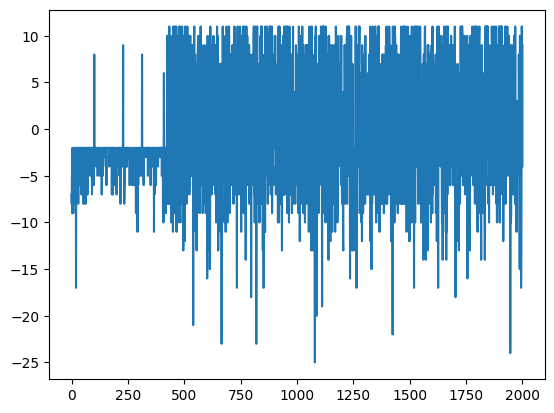

In [ ]:
import matplotlib.pyplot as plt
plt.plot(score_history)

# Test Agent

In [ ]:
class Agent:
    def __init__(self, env):
        self.env = env
        self.q_table = np.zeros([env.observation_space.n, env.action_space.n])
        self.q_table = np.load('q_table.npy')
        self.alpha = 0.5
        self.gamma = 0.9
        self.epsilon = 0.5

    def choose_action(self, state):
        return np.argmax(self.q_table[state])

    def learn(self, state, action, reward, next_state):
        old_value = self.q_table[state, action]
        next_max = np.max(self.q_table[next_state])
        new_value = old_value + self.alpha * (reward + self.gamma * next_max - old_value)
        self.q_table[state, action] = new_value


In [ ]:
env = gym.make('FrozenLake-v1', map_name='4x4', render_mode='rgb_array', is_slippery=False)

In [ ]:
terminated, truncated = False, False
state, info = env.reset()
agent = Agent(env)
env_video = []
score = 0
while not (terminated or truncated):
    action = agent.choose_action(state)
    env_video.append(env.render())
    state, reward, terminated, truncated, info = env.step(action)

    if reward >= 1:
        cus_reward = 16
    else:
        cus_reward = -1

    score += cus_reward

print(score)

11


In [ ]:
with VideoWriter(fps=5) as vw:
    for frame in env_video:
        vw.add(frame)

# Challenge

In [ ]:
env = gym.make('FrozenLake-v1', map_name='8x8', render_mode='rgb_array', is_slippery=False)

In [ ]:
terminated, truncated = False, False
state, info = env.reset()
env_video = []
while not (terminated or truncated):
    action = env.action_space.sample()
    env_video.append(env.render())
    state, reward, terminated, truncated, info = env.step(action)

In [ ]:
with VideoWriter(fps=5) as vw:
    for frame in env_video:
        vw.add(frame)

In [ ]:
class Agent:
    def __init__(self, env):
        self.env = env
        self.q_table = np.zeros([env.observation_space.n, env.action_space.n])
        # self.q_table = np.load('q_table.npy')
        self.alpha = 0.5
        self.gamma = 0.9
        self.epsilon = 0.9 # 0.9

    def choose_action(self, state):
        return np.argmax(self.q_table[state])

    def learn(self, state, action, reward, next_state):
        old_value = self.q_table[state, action]
        next_max = np.max(self.q_table[next_state])
        new_value = old_value + self.alpha * (reward + self.gamma * next_max - old_value)
        self.q_table[state, action] = new_value


In [ ]:
score_history = []
agent = Agent(env)
best_score = float('-inf')

In [ ]:
epochs = 10001
for epoch in trange(epochs):
    terminated, truncated = False, False
    state, info = env.reset()
    score = 0
    while not (terminated or truncated):
        if random.uniform(0, 1) < agent.epsilon:
            action = agent.env.action_space.sample()
        else:
            action = agent.choose_action(state)
        next_state, reward, terminated, truncated, info = env.step(action)

        # custom reward
        if reward >= 1:
            cus_reward = 64
        else:
            cus_reward = -1

        agent.learn(state, action, cus_reward, next_state)
        state = next_state
        score += cus_reward

    if score >= best_score:
        np.save('q_table.npy', agent.q_table)
        best_score = score

    score_history.append(score)

  0%|          | 0/10001 [00:00<?, ?it/s]

In [ ]:
print(best_score)

48


In [ ]:
class Agent:
    def __init__(self, env):
        self.env = env
        self.q_table = np.zeros([env.observation_space.n, env.action_space.n])
        self.q_table = np.load('q_table.npy')
        self.alpha = 0.1
        self.gamma = 0.6
        self.epsilon = 0.1

    def choose_action(self, state):
        return np.argmax(self.q_table[state])

    def learn(self, state, action, reward, next_state):
        old_value = self.q_table[state, action]
        next_max = np.max(self.q_table[next_state])
        new_value = old_value + self.alpha * (reward + self.gamma * next_max - old_value)
        self.q_table[state, action] = new_value


In [ ]:
terminated, truncated = False, False
state, info = env.reset()
agent = Agent(env)
env_video = []
score = 0
while not (terminated or truncated):
    action = agent.choose_action(state)
    env_video.append(env.render())
    state, reward, terminated, truncated, info = env.step(action)

    if reward >= 1:
        cus_reward = 64
    else:
        cus_reward = -1

    score += cus_reward

print(score)

51


In [ ]:
with VideoWriter(fps=5) as vw:
    for frame in env_video:
        vw.add(frame)

# Tetris introduction

In [ ]:
%%capture
!git clone https://github.com/DuyMinhLe13/Double-Agent-Tetris
!pip install pygame
import os
import shutil
shutil.move('/content/Double-Agent-Tetris/TetrisBattle', '/content')
shutil.move('/content/Double-Agent-Tetris/CustomAgent.py', '/content')

In [ ]:
from TetrisBattle.envs.tetris_env import TetrisDoubleEnv
from notebook_video_writer import VideoWriter
from CustomAgent import Agent
env = TetrisDoubleEnv()

In [ ]:
done = False
state = env.reset()
env_video = []
agent_list = [Agent(), Agent()]
while not done:
    env_video.append(env.render(mode='rgb_array'))
    action = agent_list[env.game_interface.getCurrentPlayerID()].choose_action(state)

    state, reward, done, _ = env.step(action)
    env.take_turns()

See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(



1


In [ ]:
with VideoWriter(fps=20) as vw:
    for frame in env_video:
        vw.add(frame)